# Sheet 9: Solution

## Exercise 1: Perceptron algorithm

1. By definition, if the points are separable then there exists $\beta$ such that 
$$ \beta^T x_i^* > 0 \text{ when } y_i = +1$$ and
$$ \beta^T x_i^* < 0 \text{ when } y_i = -1$$
for all $i=1,2,\ldots, N.$ This is equivalent to the expression that $y_i \beta^T x_i^* > 0$ for all $i.$ Equivalently we can divide this expression by $\| x_i^* \|$ to get
$$y_i \beta^T z_i^* > 0$$
for all $i.$ Since each one of these $N$ values of $y_i \beta^T z_i >0$ is positive let $m>0$ be the smallest value of this product observed over all training set. Thus we have
$$ y_i \beta^T z_i^* \geq m. $$

When we divide both sides of this inequality by this positive value of $m$ we get
$$y_i (\frac{1}{m} \beta)^T z_i \geq 1.$$

If we define $\beta_{\text{sep}} = \frac1m \beta$ we have shown that $y_i \beta_{\text{sep}}^T z_i \geq 1$ for all $i$.

2. From $\beta_{\text{new}} = \beta_{\text{old}} + y_i z_i$ we have that
    $$ \beta_{\text{new}} - \beta_{\text{sep}} = \beta_{\text{old}} - \beta_{\text{sep}} + y_i z_i.$$
    
    When we square this result we get
    $$ \|  \beta_{\text{new}} - \beta_{\text{sep}} \|^2 = \|  \beta_{\text{old}} - \beta_{\text{sep}} \|^2 + y_i^2 \| z_i \|^2 + 2 y_i ( \beta_{\text{old}} - \beta_{\text{sep}})^T z_i.$$
    
    Since $y_i = \pm 1$ and $\| z_i \|^2 = 1$ we have that $y_i \| z_i \|^2=1$ for the second term on the rhs. Note that the third term on the right-hand-side is given by 
    $$2 (y_i \beta_{\text{old}}^T z_i - y_i \beta_{\text{sep}}^T z_i).$$
    
    Since the point $y_i, z_i$ was misclassified by the vector $\beta_{\text{old}}$ we have $y_i \beta_{\text{old}}^T z_i < 0$ (if it were positive we would have classified it correctly). Since $\beta_{\text{sep}}$ is the vector that can correctly classify all points we have $y_i \beta_{\text{sep}}^T z_i \geq 1.$ 
    
    With these two facts one can write 
    $$ 2 (y_i \beta_{\text{old}}^T z_i - y_i \beta_{\text{sep}}^T z_i) \leq 2(0-1) = -2. $$
    
    Thus, we have just shown the requested statement 
    $$  \|  \beta_{\text{new}} - \beta_{\text{sep}} \|^2 \leq \|  \beta_{\text{old}} - \beta_{\text{sep}} \|^2 +1 -2.$$

## Exercise 2: Pytorch introduction on Cifar dataset

---



In [4]:
import torchvision.models as models
resnet18 = models.resnet18(pretrained=True)
resnet18.cuda()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [5]:
from torchsummary import summary
summary(resnet18, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms

In [7]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


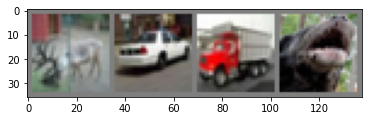

 deer   car truck   dog


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [9]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [10]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [11]:
losses_for_each_minibatch =[]
losses =[]

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        losses_for_each_minibatch.append(loss.item())

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            losses.append(running_loss/200)
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 2.304
[1,   400] loss: 2.298
[1,   600] loss: 2.293
[1,   800] loss: 2.258
[1,  1000] loss: 2.220
[1,  1200] loss: 2.182
[1,  1400] loss: 2.105
[1,  1600] loss: 2.053
[1,  1800] loss: 2.055
[1,  2000] loss: 1.961
[1,  2200] loss: 1.977
[1,  2400] loss: 1.960
[1,  2600] loss: 1.909
[1,  2800] loss: 1.920
[1,  3000] loss: 1.897
[1,  3200] loss: 1.863
[1,  3400] loss: 1.843
[1,  3600] loss: 1.809
[1,  3800] loss: 1.797
[1,  4000] loss: 1.775
[1,  4200] loss: 1.772
[1,  4400] loss: 1.747
[1,  4600] loss: 1.723
[1,  4800] loss: 1.696
[1,  5000] loss: 1.720
[1,  5200] loss: 1.717
[1,  5400] loss: 1.675
[1,  5600] loss: 1.697
[1,  5800] loss: 1.686
[1,  6000] loss: 1.661
[1,  6200] loss: 1.673
[1,  6400] loss: 1.603
[1,  6600] loss: 1.604
[1,  6800] loss: 1.576
[1,  7000] loss: 1.585
[1,  7200] loss: 1.613
[1,  7400] loss: 1.607
[1,  7600] loss: 1.590
[1,  7800] loss: 1.586
[1,  8000] loss: 1.569
[1,  8200] loss: 1.514
[1,  8400] loss: 1.531
[1,  8600] loss: 1.578
[1,  8800] 

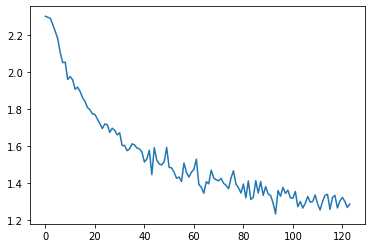

In [12]:
#loss for 200 minibatches
plt.plot(losses)

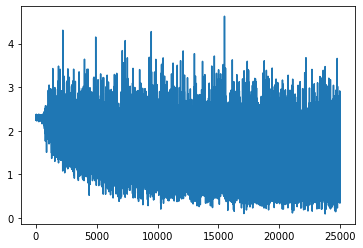

In [13]:
#loss for each minibatch
plt.plot(losses_for_each_minibatch)

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

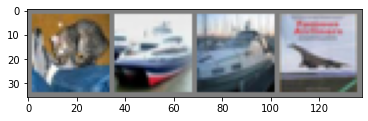

GroundTruth:    cat  ship  ship plane


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car  ship plane


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 60 %


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 65 %
Accuracy of   car : 81 %
Accuracy of  bird : 35 %
Accuracy of   cat : 36 %
Accuracy of  deer : 64 %
Accuracy of   dog : 51 %
Accuracy of  frog : 70 %
Accuracy of horse : 72 %
Accuracy of  ship : 64 %
Accuracy of truck : 63 %
